In [13]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split



In [14]:
data = pd.read_csv('car_data/auto-mpg.data')
print(data.head())


   cylinders  displacement  horsepower  weight  acceleration  model_year  \
0          8         307.0       130.0  3504.0          12.0          70   
1          8         350.0       165.0  3693.0          11.5          70   
2          8         318.0       150.0  3436.0          11.0          70   
3          8         304.0       150.0  3433.0          12.0          70   
4          8         302.0       140.0  3449.0          10.5          70   

   origin                   car_name   mpg  
0       1  chevrolet chevelle malibu  18.0  
1       1          buick skylark 320  15.0  
2       1         plymouth satellite  18.0  
3       1              amc rebel sst  16.0  
4       1                ford torino  17.0  


In [15]:
print('min: ', data['mpg'].min())
print('max: ', data['mpg'].max())
print('mean: ', data['mpg'].mean())
print('median: ', data['mpg'].median())
print('std: ', data['mpg'].std())
print('var: ', data['mpg'].var())
print('mode: ', data['mpg'].mode())

min:  9.0
max:  46.6
mean:  23.514572864321607
median:  23.0
std:  7.815984312565782
var:  61.089610774274405
mode:  0    13.0
Name: mpg, dtype: float64


In [16]:
print('info: ', data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cylinders     398 non-null    int64  
 1   displacement  398 non-null    float64
 2   horsepower    398 non-null    float64
 3   weight        398 non-null    float64
 4   acceleration  398 non-null    float64
 5   model_year    398 non-null    int64  
 6   origin        398 non-null    int64  
 7   car_name      398 non-null    object 
 8   mpg           398 non-null    float64
dtypes: float64(5), int64(3), object(1)
memory usage: 28.1+ KB
info:  None


In [17]:
data = data[data.mpg != 0]

# Convert values in the 'mpg' column based on the given conditions
data['mpg'] = data['mpg'].apply(lambda x: 0 if x < 20 else (1 if x < 30 else 2))
print(data.head())

   cylinders  displacement  horsepower  weight  acceleration  model_year  \
0          8         307.0       130.0  3504.0          12.0          70   
1          8         350.0       165.0  3693.0          11.5          70   
2          8         318.0       150.0  3436.0          11.0          70   
3          8         304.0       150.0  3433.0          12.0          70   
4          8         302.0       140.0  3449.0          10.5          70   

   origin                   car_name  mpg  
0       1  chevrolet chevelle malibu    0  
1       1          buick skylark 320    0  
2       1         plymouth satellite    0  
3       1              amc rebel sst    0  
4       1                ford torino    0  


In [18]:
mpg_counts = data['mpg'].value_counts()
print(mpg_counts)

1    155
0    151
2     92
Name: mpg, dtype: int64


In [19]:
data = data.dropna()
data = data.drop('car_name', axis=1)

predictors = data.drop("mpg",axis=1)
target = data["mpg"]

X_train,X_test,Y_train,Y_test = train_test_split(predictors,target,test_size=0.20,random_state=42)

In [20]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=0)

search_space = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],
    'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10],
    'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'max_features': ['sqrt', 'log2']
}

In [21]:
from sklearn.model_selection import GridSearchCV

clf = GridSearchCV(dt, search_space, cv=5, verbose=0)

In [22]:
best_model = clf.fit(X_train, Y_train)
print('completed')

completed


In [25]:
print('Best Criterion:', best_model.best_estimator_.get_params()['criterion'])
print('Best Max Depth:', best_model.best_estimator_.get_params()['max_depth'])
print('Best Min Samples Split:', best_model.best_estimator_.get_params()['min_samples_split'])
print('Best Min Samples Leaf:', best_model.best_estimator_.get_params()['min_samples_leaf'])
print('Best Max Features:', best_model.best_estimator_.get_params()['max_features'])

Best Criterion: gini
Best Max Depth: 5
Best Min Samples Split: 3
Best Min Samples Leaf: 1
Best Max Features: sqrt


In [23]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(best_model.best_estimator_, X_train, Y_train, cv=5, scoring='accuracy', n_jobs=-1, train_sizes=[np.linspace(0.01, 1.0, 50)], verbose=1, random_state=42)

[learning_curve] Training set sizes: [  2   7  12  17  23  28  33  38  43  48  53  58  64  69  74  79  84  89
  94 100 105 110 115 120 125 130 135 141 146 151 156 161 166 171 177 182
 187 192 197 202 207 212 218 223 228 233 238 243 248 254]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:    1.7s finished


In [24]:
print(test_scores.max())

0.859375


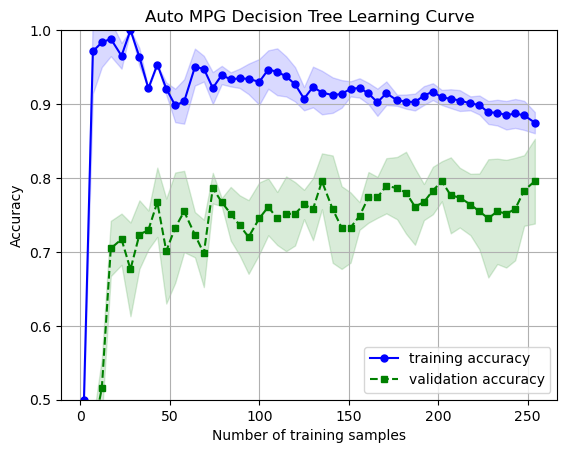

In [27]:
import matplotlib.pyplot as plt
import numpy as np
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='training accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='validation accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Auto MPG Decision Tree Learning Curve')
plt.ylim([0.5, 1.0])
plt.show()

In [28]:
from sklearn.model_selection import validation_curve

param_range = [2, 3, 4, 5, 6, 7, 8, 9, 10]
val_train_scores, val_test_scores = validation_curve(best_model.best_estimator_, X_train, Y_train, param_name='max_depth', param_range=param_range, cv=5, scoring='accuracy', n_jobs=-1)

train_mean = np.mean(val_train_scores, axis=1)
train_std = np.std(val_train_scores, axis=1)
test_mean = np.mean(val_test_scores, axis=1)
test_std = np.std(val_test_scores, axis=1)

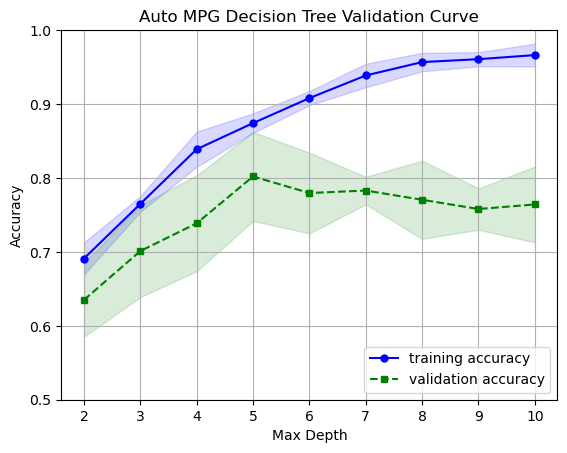

In [37]:
plt.plot(param_range, train_mean, color='blue', marker='o', markersize=5, label='training accuracy')
plt.fill_between(param_range, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(param_range, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='validation accuracy')
plt.fill_between(param_range, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.grid()
plt.xscale('linear')
plt.legend(loc='lower right')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Auto MPG Decision Tree Validation Curve')
plt.ylim([0.5, 1.0])
plt.show()

In [1]:
print(test_scores.max())

NameError: name 'test_scores' is not defined

In [25]:
from sklearn.metrics import confusion_matrix

y_pred = best_model.best_estimator_.predict(X_test)
confmat = confusion_matrix(y_true=Y_test, y_pred=y_pred)
print(confmat)

[[27  3  0]
 [ 1 28  7]
 [ 0  1 13]]


In [28]:
from sklearn.metrics import precision_score, recall_score, f1_score

print('Precision: %.3f' % precision_score(y_true=Y_test, y_pred=y_pred, average='macro'))
print('Recall: %.3f' % recall_score(y_true=Y_test, y_pred=y_pred, average='macro'))
print('F1: %.3f' % f1_score(y_true=Y_test, y_pred=y_pred, average='macro'))

Precision: 0.830
Recall: 0.869
F1: 0.840


In [32]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_true=Y_test, y_score=y_pred, pos_label=1)
roc_auc = auc(x=fpr, y=tpr)
print('ROC AUC: %.3f' % roc_auc)

ROC AUC: 0.687


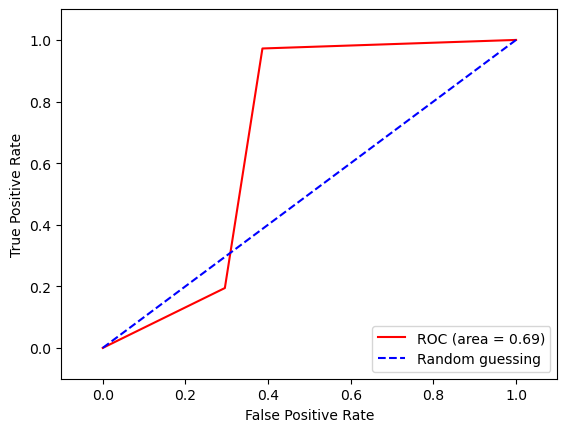

In [33]:
plt.plot(fpr, tpr, color='red', label='ROC (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], linestyle='--', color='blue', label='Random guessing')
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

In [34]:
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import cross_val_score

scorer = make_scorer(accuracy_score)
scores = cross_val_score(estimator=best_model.best_estimator_, X=X_train, y=Y_train, cv=10, n_jobs=-1, scoring=scorer)
print('CV accuracy scores: %s' % scores)
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

CV accuracy scores: [0.8125     0.8125     0.8125     0.75       0.65625    0.84375
 0.78125    0.75       0.70967742 0.83870968]
CV accuracy: 0.777 +/- 0.057


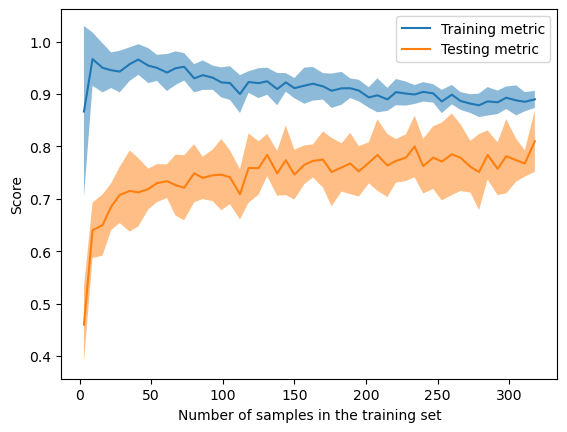

In [35]:
from sklearn.model_selection import LearningCurveDisplay, ShuffleSplit

cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=1)
common_params = dict(X=predictors, y=target, cv=cv, scoring='accuracy', n_jobs=-1, score_type='both', train_sizes=np.linspace(0.01, 1.0, 50), verbose=0)
fit_params = {
    'criterion': best_model.best_estimator_.get_params()['criterion'],
    'max_depth': best_model.best_estimator_.get_params()['max_depth'],
    'min_samples_split': best_model.best_estimator_.get_params()['min_samples_split'],
    'min_samples_leaf': best_model.best_estimator_.get_params()['min_samples_leaf'],
    'max_features': best_model.best_estimator_.get_params()['max_features']
}
X, y = predictors, target
dtc = DecisionTreeClassifier(**fit_params)
viz = LearningCurveDisplay.from_estimator(dtc, **common_params)